<a href="https://colab.research.google.com/github/snigdha6106/FMML_Projects_and_Labs/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [91]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [146]:
topic1 = 'Giraffe'
topic2 = 'Rhinoceros'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

This is what the text looks like:

In [147]:
es2

'Rhinoceros es un género de mamíferos perisodáctilos de la familia Rhinocerotidae, que incluye dos especies actuales de rinocerontes asiáticos caracterizadas por poseer un solo cuerno.\n\n\n== Especies ==\nEl género Rhinoceros incluye las siguientes especies:[1]\u200b\n\nRhinoceros sivalensis †\nRhinoceros paleindicus †\nRhinoceros platyrhinus †\nRhinoceros sinensis †\nRhinoceros unicornis - rinoceronte indio\nRhinoceros sondaicus - rinoceronte de Java\n\n\n== Referencias ==\n\n\n== Enlaces externos ==\n Wikimedia Commons alberga una categoría multimedia sobre Rhinoceros.\n Wikispecies tiene un artículo sobre Rhinoceros.'

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [148]:
def cleanup(text):
  text = text.upper()  # make it uppercase
  text = re.sub('[^A-Z]+', '', text) # only keep characters
  return text

In [149]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [150]:
print(eng1)

THEGIRAFFEISALARGEAFRICANHOOFEDMAMMALBELONGINGTOTHEGENUSGIRAFFAITISTHETALLESTLIVINGTERRESTRIALANIMALANDTHELARGESTRUMINANTONEARTHTRADITIONALLYGIRAFFESHAVEBEENTHOUGHTOFASONESPECIESGIRAFFACAMELOPARDALISWITHNINESUBSPECIESMOSTRECENTLYRESEARCHERSPROPOSEDDIVIDINGTHEMINTOFOUREXTANTSPECIESDUETONEWRESEARCHINTOTHEIRMITOCHONDRIALANDNUCLEARDNAANDINDIVIDUALSPECIESCANBEDISTINGUISHEDBYTHEIRFURCOATPATTERNSSEVENOTHEREXTINCTSPECIESOFGIRAFFAAREKNOWNFROMTHEFOSSILRECORDTHEGIRAFFESDISTINGUISHINGCHARACTERISTICSAREITSEXTREMELYLONGNECKANDLEGSHORNLIKEOSSICONESANDSPOTTEDCOATPATTERNSITISCLASSIFIEDUNDERTHEFAMILYGIRAFFIDAEALONGWITHITSCLOSESTEXTANTRELATIVETHEOKAPIITSSCATTEREDRANGEEXTENDSFROMCHADINTHENORTHTOSOUTHAFRICAINTHESOUTHANDFROMNIGERINTHEWESTTOSOMALIAINTHEEASTGIRAFFESUSUALLYINHABITSAVANNAHSANDWOODLANDSTHEIRFOODSOURCEISLEAVESFRUITSANDFLOWERSOFWOODYPLANTSPRIMARILYACACIASPECIESWHICHTHEYBROWSEATHEIGHTSMOSTOTHERGROUNDBASEDHERBIVORESCANNOTREACHLIONSLEOPARDSSPOTTEDHYENASANDAFRICANWILDDOGSMAYPREYUPONGIRAFFESGIRAFFESLIV

In [151]:
print(es1)

LASJIRAFADESUDFRICAGIRAFFACAMELOPARDALISGIRAFFAESUNASUBESPECIEDEGIRAFFACAMELOPARDALISCUYAREASEEXTIENDEALSURDELCONTINENTEAFRICANOSUDFRICANAMIBIABOTSUANAZIMBABUEYSURDEMOZAMBIQUECONBASEENESTUDIOSGENTICOSALGUNOSLACONSIDERANUNAESPECIEDIFERENTESEDIFERENCIADELASOTRASSUBESPECIESCONLASQUESECRUZAFCILMENTEPORLASMANCHASREDONDASOENFORMADEESTRELLAPRESENTESENTODOELPIEHASTALASPEZUASREFERENCIASENLACESEXTERNOSWIKISPECIESTIENEUNARTCULOSOBREGIRAFFAGIRAFFAGIRAFFAWIKIMEDIACOMMONSALBERGAUNACATEGORAMULTIMEDIASOBREGIRAFFAGIRAFFAGIRAFFA


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [152]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

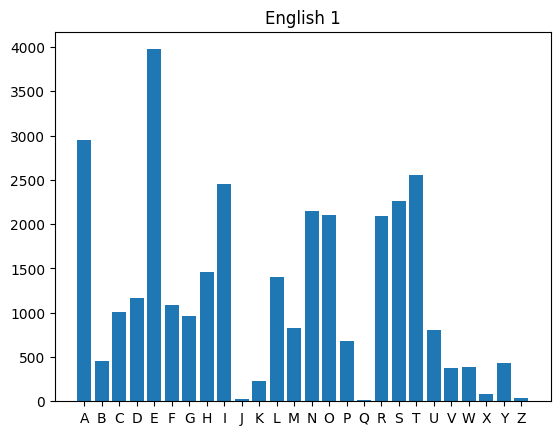

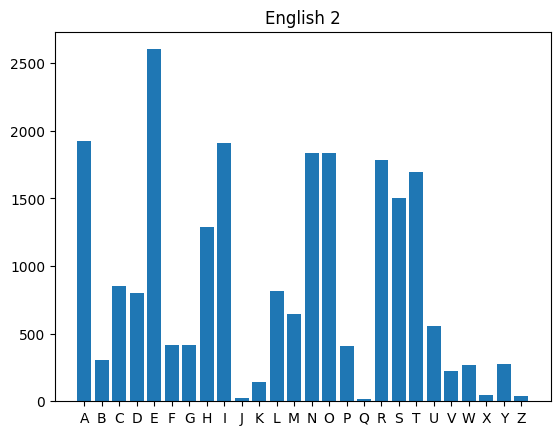

In [153]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

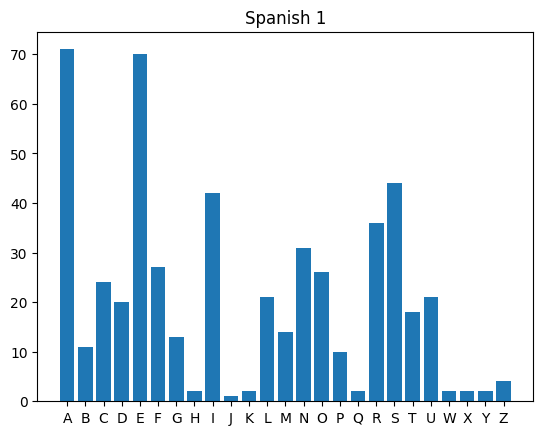

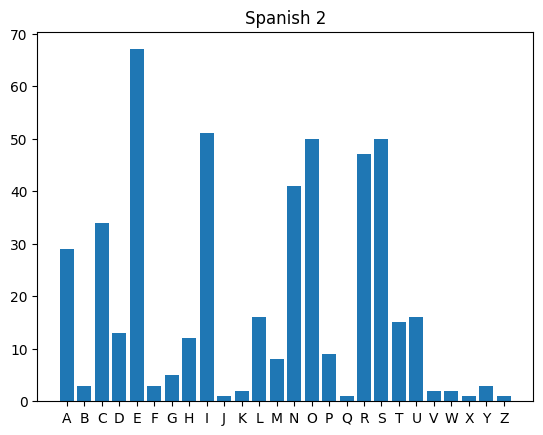

In [154]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Spanish 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Spanish 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

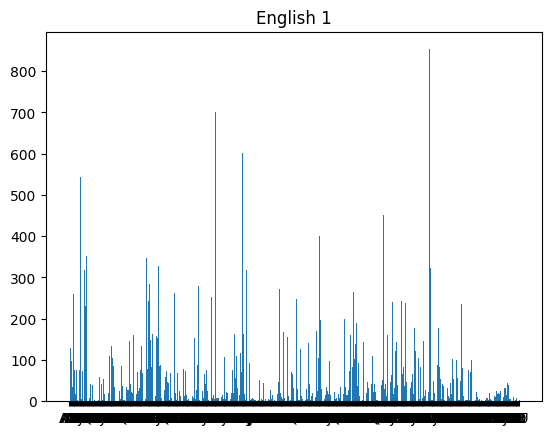

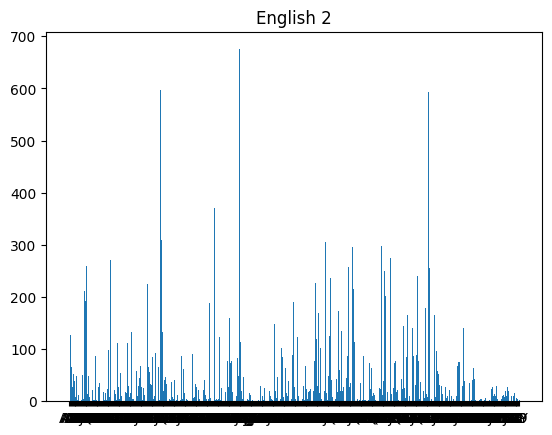

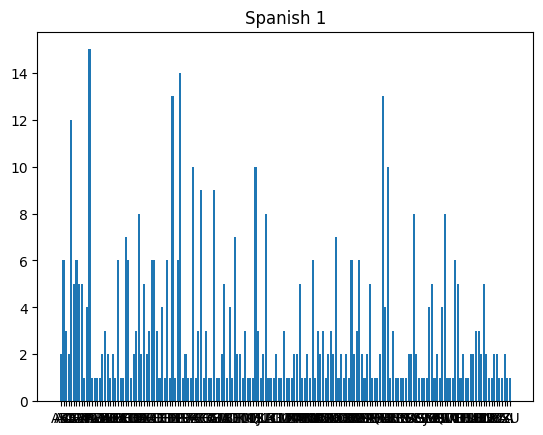

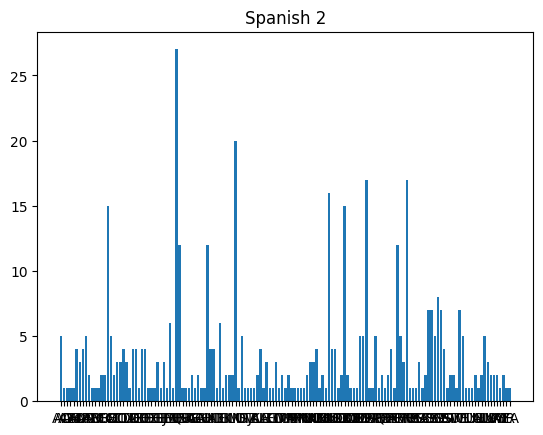

In [155]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
plothistogram(bigram_es1)
plt.title('Spanish 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Spanish 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [156]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('A')+ii), chr(ord('A')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

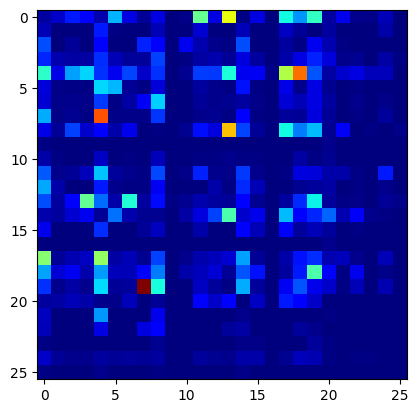

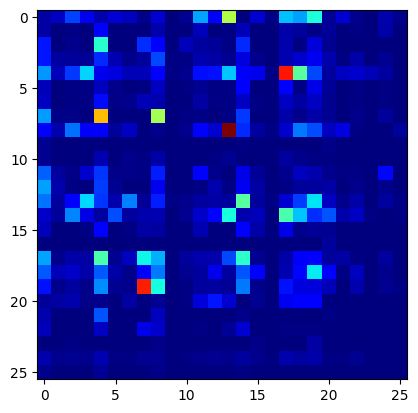

In [157]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

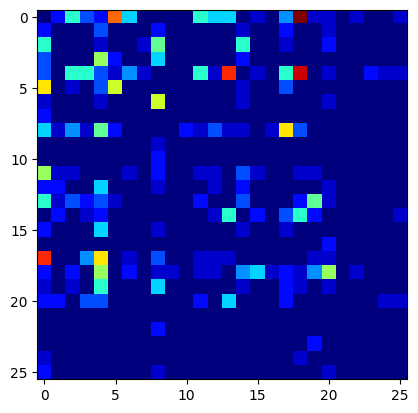

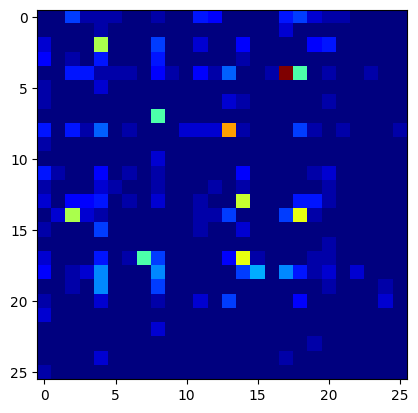

In [158]:
bies1 = plotbihistogram(bigram_es1)
plt.show()
bies2 = plotbihistogram(bigram_es2)

Let us look at the top 10 ngrams for each text.

In [159]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('A')+i), chr(ord('A')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [160]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nSpanish 1:')
ShowTopN(bies1)
print('\nSpanish 2:')
ShowTopN(bies2)


English 1:
('T', 'H') : 853.0
('H', 'E') : 700.0
('E', 'S') : 674.0
('I', 'N') : 601.0
('A', 'N') : 543.0
('E', 'R') : 483.0
('R', 'E') : 452.0
('R', 'A') : 439.0
('A', 'L') : 406.0
('N', 'D') : 401.0

English 2:
('I', 'N') : 675.0
('E', 'R') : 597.0
('T', 'H') : 593.0
('H', 'E') : 478.0
('A', 'N') : 380.0
('H', 'I') : 371.0
('E', 'S') : 310.0
('N', 'O') : 306.0
('R', 'E') : 297.0
('O', 'R') : 296.0

Spanish 1:
('A', 'S') : 15.0
('E', 'S') : 14.0
('R', 'A') : 13.0
('E', 'N') : 13.0
('A', 'F') : 12.0
('F', 'A') : 10.0
('R', 'E') : 10.0
('I', 'R') : 10.0
('F', 'F') : 9.0
('G', 'I') : 9.0

Spanish 2:
('E', 'R') : 27.0
('I', 'N') : 20.0
('R', 'O') : 17.0
('O', 'S') : 17.0
('N', 'O') : 16.0
('O', 'C') : 15.0
('C', 'E') : 15.0
('R', 'H') : 12.0
('H', 'I') : 12.0
('E', 'S') : 12.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [205]:
#different languages
topic1 = 'Hippopotamus'
topic2 = 'Elephant'
#chinese
wikipedia.set_lang('zh')

zh1 = wikipedia.page(topic1).content
zh2 = wikipedia.page(topic2).content
#telugu
wikipedia.set_lang('te')

te1 = wikipedia.page(topic1).content
te2 = wikipedia.page(topic2).content

print(te1)
print(zh2)

నీటి గుఱ్ఱం ఒక సాధు జంతువు. ఇది ఏనుగులా ఉంటుంది. ఇది ఎక్కువగా ఆఫ్రిాలో ఉంటుంది. సహారా ఎడారి దిగువ భాగంలో దక్ఇషిణ ఆఫ్రికా దేశాలలో ఎక్కువగా ఉంటాయి. ఇవి శాఖాహార జీవులు. శరీరం భారీ అయినప్పటికీ వీటికి దూకుడు స్వభావం ఎక్కువ. ఇవి ఎక్కువగా నీటిలో జీవిస్తాయి.


== బయటి లంకెలు ==

"Hippos: Wildlife summary". African Wildlife Foundation. Archived from the original on 2010-11-19. Retrieved 2014-08-25.
"Pablo Escobar's Fugitive Hippo Shot Dead". The Telegraph. 2009-06-15.
"Pablo Escobar's fugitive hippos: zoologists called in to round up animals". The Telegraph. 2009-08-27.
Kremer, William (2014-06-25). "Pablo Escobar's hippos: A growing problem". BBC News.
IUCN Hippo Specialist Group
Hippos of Lake Edward a blog about the last significant group of Hippos in Virunga National Park, DRC
Section 8. King Tut may have been killed by a hippopotamus Ancient History Encyclopedia


== మూలాలు ==
《elephant DEE》是台灣藝人徐熙娣以“elephant DEE”名義發行的個人迷你專輯， 專輯由亞神音樂于2014年12月12日正式發行。


== 概況 ==
《elephant DEE》是徐熙娣暌违歌坛13年后再度

In [203]:
#different topics
topic1 = 'Pencil'
topic2 = 'Elephant'
#chinese
wikipedia.set_lang('zh')

zh1 = wikipedia.page(topic1).content
zh2 = wikipedia.page(topic2).content
#telugu
wikipedia.set_lang('te')

te1 = wikipedia.page(topic1).content
te2 = wikipedia.page(topic2).content

print(zh1)
print(te2)

Apple Pencil是一個由蘋果公司所設計與發售的觸控筆系列产品，只能在特定型號的iPad系列平板電腦使用，不支援iPhone、iPod Touch及其他廠牌的行動裝置。Apple Pencil 在2015年9月9日的秋季產品發表會上首次公開，並於2015年11月開始發售。


== 產品介紹 ==
Apple Pencil以藍牙和iPad Pro連線。擁有壓力感測及角度偵測系統，可以偵測力道，例如：利用筆壓下更深或更淺的筆觸由使用者的力道決定。使用Apple Pencil更能在使用時減少延遲並順暢的繪畫。
iPad能夠同時使用Apple Pencil與手指，且可偵測避免手掌誤觸控，因此可像一般書寫或繪畫時，將手掌放置於螢幕上而無須懸空。


=== 第一代 ===
第一代Apple Pencil有一個可以拆卸的筆蓋。在筆蓋底下有一個Lightning連接器，可以連接Lightning裝置進行充電。


=== 第二代 ===
2018年10月30日，蘋果公司宣布推出第二代Apple Pencil搭配新一代iPad Pro。此代Apple Pencil使用磁吸在iPad機身上，以無線方式充電，不再內建Lightning連接器。


=== USB-C ===
2023年10月17日，蘋果公司發布了一款新的入門級Apple Pencil型號，與使用USB-C連接器的iPad型號相容。外型與第二代Apple Pencil相近，長度與直徑略小於第二代，但由於定位為入門級產品，因此缺乏第二代Apple Pencil具有的壓力敏感度和點擊敏感區域，但仍支援在受支援的iPad型號上進行懸停檢測。它透過向上滑動蓋子隱藏的USB-C連接埠充電，不支援無線充電。


=== Pro ===
2024年5月7日，苹果公司发布了Apple Pencil Pro。笔杆中配备了一传感器，可实现轻捏、侧旋、悬停和触觉反馈。Apple Pencil Pro 支持查找。


== 用途 ==
Apple Pencil是設計用來讓藝術家完成創作，它讓在iPad Pro上面的電子繪畫變的可能。不過，多點觸控還是iPad Pro的主要輸入功能。 在2015年9月的蘋果發表會，蘋果公司演示了透過Apple Pencil來在Adobe Creative Suite裡的軟體裡作畫 以及在Microsoft

In [206]:
#for different source other than wikipedia, we can extract text from datasets or urls

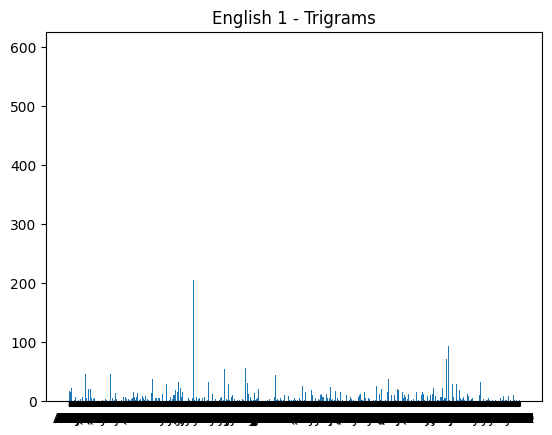

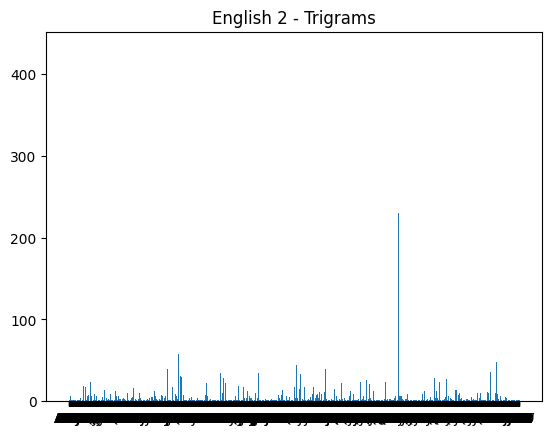

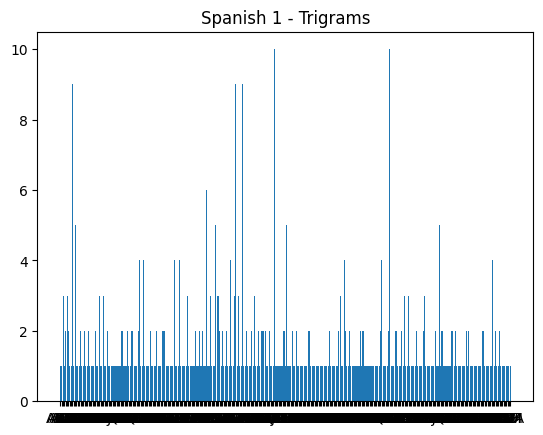

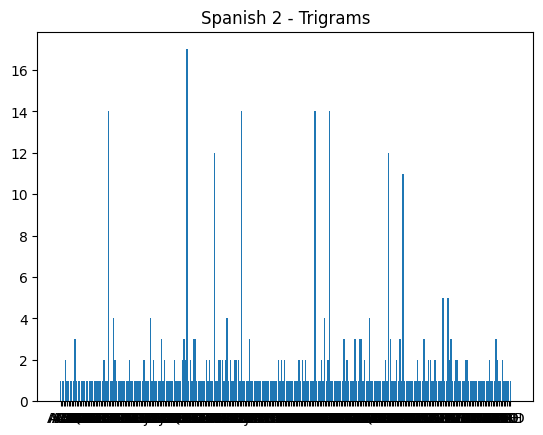

In [182]:
#using trigrams

trigram_eng1 = Counter(ngrams(eng1, 3))  # Trigrams for English 1
plothistogram(trigram_eng1)
plt.title('English 1 - Trigrams')
plt.show()

trigram_eng2 = Counter(ngrams(eng2, 3))  # Trigrams for English 2
plothistogram(trigram_eng2)
plt.title('English 2 - Trigrams')
plt.show()

trigram_es1 = Counter(ngrams(es1, 3))  # Trigrams for Spanish 1
plothistogram(trigram_es1)
plt.title('Spanish 1 - Trigrams')
plt.show()

trigram_es2 = Counter(ngrams(es2, 3))  # Trigrams for Spanish 2
plothistogram(trigram_es2)
plt.title('Spanish 2 - Trigrams')
plt.show()


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [161]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [162]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

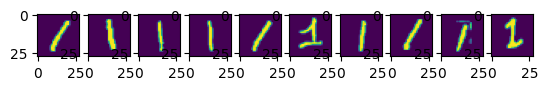

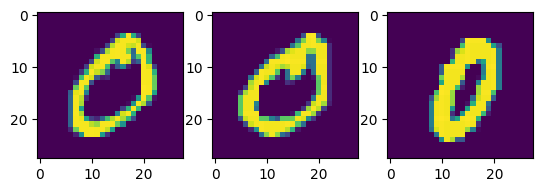

In [164]:
for ii in range(10):
  plt.subplot(1,10, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(3):
  plt.subplot(1, 3, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [165]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

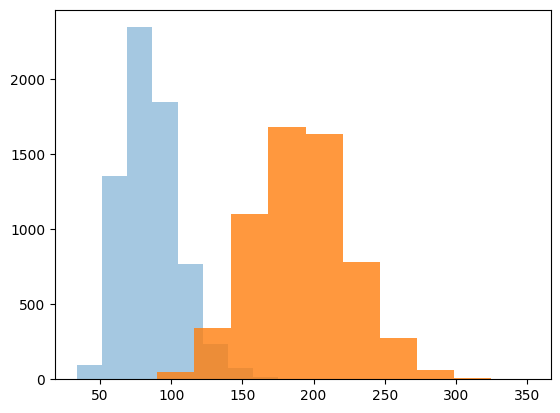

In [167]:
plt.hist(sum1, alpha=0.4);
plt.hist(sum0, alpha=0.8);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [168]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

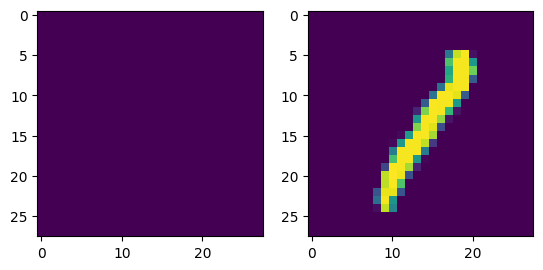

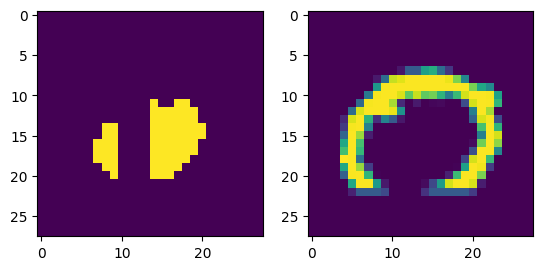

In [169]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

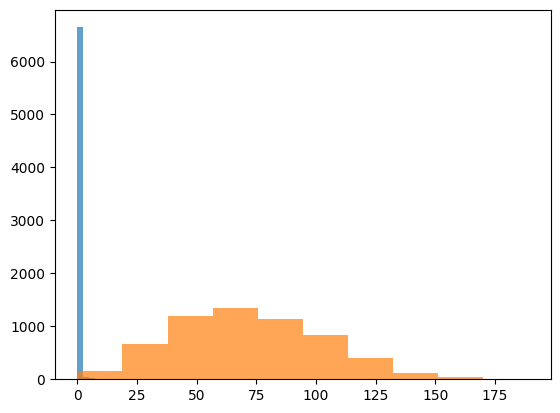

In [170]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [171]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

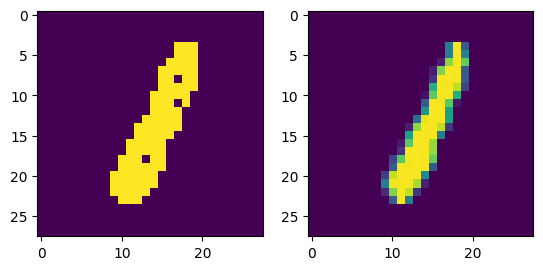

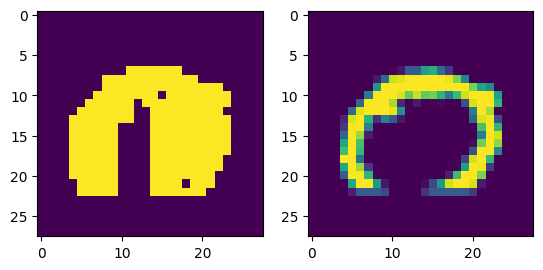

In [175]:
imgs = [no1[3000,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

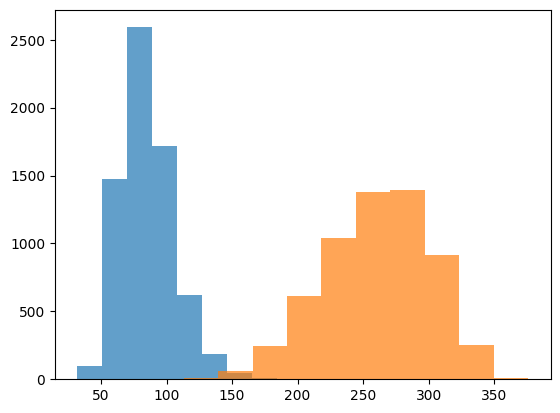

In [176]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [177]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

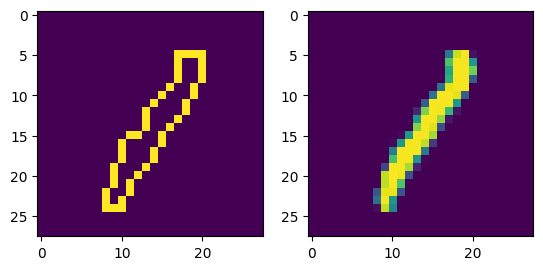

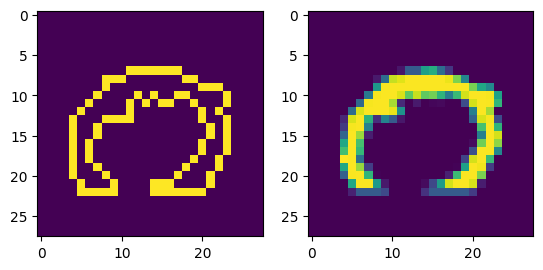

In [178]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

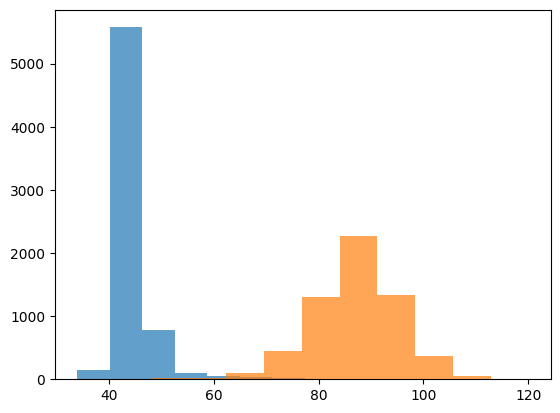

In [179]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

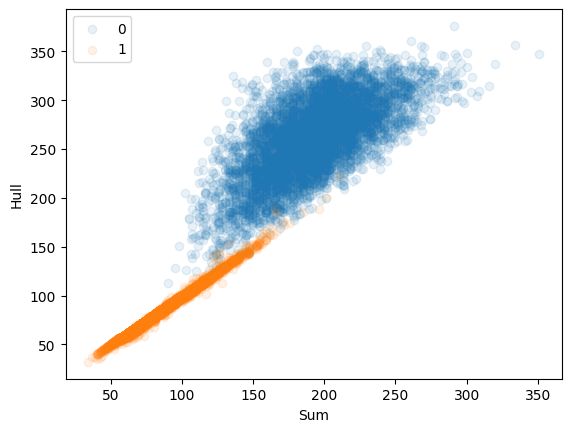

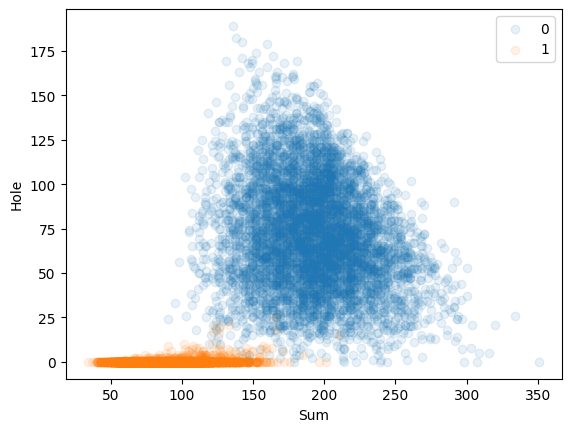

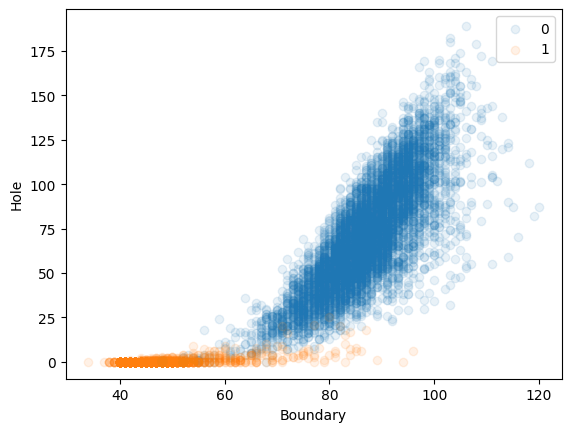

In [180]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [181]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?